# Linear Regression

Linear regression is a simple approach to supervised learning. It assumes that the dependence of Y on X1, X2, . . . Xp is linear. True regression functions are never linear

![Fig](imgs/lin_reg_001.png)

Let's see the same slide we saw earlier

![Fig](imgs/lin_reg_002.png)

Questions to ask -
1. Is there a relationship between number of ads and sales
2. How strong is the relationship between number of ads and sales
3. Which media contribute to sales?
4. How accurately can we predict future sales.
5. Is the relationship linear?

## Simple linear regression using single predictor X

![Fig](imgs/lin_reg_003.png)

beta-0 and beta-1 are coefficients, X is the single predictor and epsilon is the error term

We predict y-hat using beta-0 hat and beta-1 hat

![Fig](imgs/lin_reg_004.png)

### Residual sum of squares or RSS

![Fig](imgs/lin_reg_005.png), ![Fig](imgs/lin_reg_006.png)

![Fig](imgs/lin_reg_007.png)

![Fig](imgs/lin_reg_008.png)

The standard error of an estimator reflects how it varies under repeated sampling. The standard error of the estimate is a measure of the accuracy of predictions. Recall that the regression line is the line that minimizes the sum of squared deviations of prediction (also called the sum of squares error).

![Fig](imgs/lin_reg_009.png)

General formula for variance -

![Fig](imgs/lin_reg_018.png)

Standard error is used to calculate confidence interval. There is 95% chance that true value of beta-1 is in the range

![Fig](imgs/lin_reg_010.png)

### Hypothesis Testing

Standard errors can also be used to perform hypothesis tests on the coefficients. 

The most common hypothesis test involves testing the null hypothesis of <br>

H0 : There is no relationship between X and Y <br>
HA : There is some relationship between X and Y .

To test the null hypothesis, we compute a t-statistic, given by

![Fig](imgs/lin_reg_011.png)

Using statistical software, it is easy to compute the probability of observing any value equal to |t| or larger. We
call this probability the p-value

A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, so you reject the null hypothesis.

A large p-value (> 0.05) indicates weak evidence against the null hypothesis, so you fail to reject the null hypothesis.

p-values very close to the cutoff (0.05) are considered to be marginal (could go either way). Always report the p-value so your readers can draw their own conclusions.

![Fig](imgs/lin_reg_012.png)

#### Example

For example, suppose a pizza place claims their delivery times are 30 minutes or less on average but you think it’s more than that. You conduct a hypothesis test because you believe the null hypothesis, HO, that the mean delivery time is 30 minutes max, is incorrect. Your alternative hypothesis (HA) is that the mean time is greater than 30 minutes. 

You randomly sample some delivery times and run the data through the hypothesis test, and your p-value turns out to be 0.001, which is much less than 0.05. In real terms, there is a probability of 0.001 that you will mistakenly reject the pizza place’s claim that their delivery time is less than or equal to 30 minutes. Since typically we are willing to reject the null hypothesis when this probability is less than 0.05, you conclude that the pizza place is wrong; their delivery times are in fact more than 30 minutes on average, and you want to know what they’re gonna do about it! 

Residual Standard Error is calculated as 

![Fig](imgs/lin_reg_013.png)

R-squared of fraction of variance is explaied as 

![Fig](imgs/lin_reg_014.png)

where

![Fig](imgs/lin_reg_015.png)
![Fig](imgs/lin_reg_016.png)

It can be shown that for linear regression, R-squared is equal to r-squared, the correlation between X and Y.


## Multiple Linear regression

![Fig](imgs/lin_reg_017.png)

### Interpreting Regression Coefficients

The ideal scenario is when the predictors are uncorrelated a balanced design:<br>
1. Each coefficient can be estimated and tested separately. <br>
2. Interpretations such as “a unit change in Xj is associated with a βj change in Y ,while all the other variables stay fixed”, are possible.<br>

Correlations amongst predictors cause problems: <br>
1. The variance of all coefficients tends to increase, sometimes dramatically. <br>
2. Interpretations become hazardous — when Xj changes,everything else changes. <br>

## Interactions between variables

• In our previous analysis of the Advertising data, we assumed that the effect on sales of increasing one<br>
advertising medium is independent of the amount spent on the other media.<br>
• For example, the linear model<br>
sales = β0 + β1 × TV + β2 × radio + β3 × newspaper <br>
states that the average effect on sales of a one-unit increase in TV is always β1, regardless of the amount spent
on radio.

Model takes the form <br>
sales = β0 + β1 × TV + β2 × radio + β3 × (radio × TV) + epsilon<br>
= β0 + (β1 + β3 × radio) × TV + β2 × radio + eplsilon<br>

## Example of linear regression

In [ ]:
# X represents the features of our training data, the diameters of the pizzas. 
# A scikit-learn convention is to name the matrix of feature vectors X.  
# Uppercase letters indicate matrices, and lowercase letters indicate vectors. 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

X = np.array([[6], [8], [10], [14], [18]]).reshape(-1, 1) 
y = [350, 500, 700, 850, 1000]  # y is a vector representing the prices of the pizzas.
 
plt.figure() 
plt.title('Pizza price plotted against diameter') 
plt.xlabel('Diameter in inches') 
plt.ylabel('Price in rupees') 
plt.plot(X, y, 'k.') 
plt.axis([0, 25, 300, 1100]) 
plt.grid(True) 
plt.show()

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()  # Create an instance of the estimator
model.fit(X, y)  # Fit the model on the training data 

# Predict the price of a pizza with a diameter that has never been seen before 
test_pizza = np.array([[12]]) 
predicted_price = model.predict(test_pizza)[0] 
print('A 12" pizza should cost: Rupees %.2f' % predicted_price)

A 12" pizza should cost: Rupees 722.41


### Evaluating the fitness of a model with a cost function

A cost function, also called a loss function, is used to define and measure the error of a model.

In [18]:
print('Residual sum of squares: %.2f' % np.mean((model.predict(X)- y) ** 2))

Residual sum of squares: 2431.03


In [19]:
x_bar = X.mean()
print(x_bar)

11.2


In [20]:
# Note that we subtract one from the number of training instances when calculating the sample variance. 
# This technique is called Bessel's correction. It corrects the bias in the estimation of the population variance
# from a sample.
variance = ((X - x_bar)**2).sum() / (X.shape[0] - 1)
print(variance)

23.2


### Covariance

Covariance is a measure of how much two variables change together. If the variables increase together, their covariance is positive. If one variable tends to increase while the other decreases, their covariance is negative. If there is no linear relationship between the two variables, their covariance will be equal to zero; they are linearly uncorrelated but not necessarily independent.

![Fig](imgs/lin_reg_019.png)

In [23]:
y_bar = np.mean(y)
covariance = np.multiply((X - x_bar).transpose(), y - y_bar).sum() / (X.shape[0] - 1)
print(covariance)
print(np.cov(X.transpose(), y)[0][1])

1230.0
1230.0


In [25]:
beta_1 = covariance/variance
print(beta_1)

53.01724137931035


In [27]:
beta_0 = y_bar - (beta_1 * x_bar)
print(beta_0)

86.20689655172418


In [29]:
RSS = ((y - model.predict(X)) ** 2).sum()
print(RSS)

12155.17241379309


In [31]:
TSS = ((y - y_bar) ** 2).sum()
print(TSS)

273000.0


In [34]:
R_squared = 1-(RSS/TSS)
print(R_squared)

0.9554755589238348


In [35]:
X_test = np.array([8, 9, 11, 16, 12]).reshape(-1, 1) 
y_test = [500, 610, 685, 1200, 900]  

In [41]:
RSS = ((y_test - model.predict(X_test)) ** 2).sum()
print(RSS)

104561.84601664684


In [42]:
y_test_bar = np.mean(y_test)

In [43]:
TSS = ((y_test - y_test_bar) ** 2).sum()
print(TSS)

307120.0


In [44]:
R_squared = 1-(RSS/TSS)
print(R_squared)

0.6595407462338928


In [36]:
model.score(X_test, y_test)

0.6595407462338928

In [45]:
from sklearn.metrics import r2_score
r2_score(y_test, model.predict(X_test))

0.6595407462338928

R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression.

The definition of R-squared is fairly straight-forward; it is the percentage of the response variable variation that is explained by a linear model. Or:

R-squared = Explained variation / Total variation

R-squared is always between 0 and 100%:

0% indicates that the model explains none of the variability of the response data around its mean.
100% indicates that the model explains all the variability of the response data around its mean.
In general, the higher the R-squared, the better the model fits your data. However, there are important conditions for this guideline that I’ll talk about both in this post and my next post.

### Adjusted R-squared

![Fig](imgs/lin_reg_020.png)

In [ ]:
where n  is the number of observations and p is the number of variables

In [49]:
n = 5
p = 1
adjusted_R_squared = 1-((1-0.6595407462338928) * (4/5))
print(adjusted_R_squared)

0.7276325969871142


### Statistical Methods for Finding the Best Regression Model

For a good regression model, you want to include the variables that you are specifically testing along with other variables that affect the response in order to avoid biased results. Minitab Statistical Software offers statistical measures and procedures that help you specify your regression model.

Adjusted R-squared and Predicted R-squared: Generally, you choose the models that have higher adjusted and predicted R-squared values. These statistics are designed to avoid a key problem with regular R-squared—it increases every time you add a predictor and can trick you into specifying an overly complex model.

The adjusted R squared increases only if the new term improves the model more than would be expected by chance and it can also decrease with poor quality predictors.
The predicted R-squared is a form of cross-validation and it can also decrease. Cross-validation determines how well your model generalizes to other data sets by partitioning your data.
P-values for the predictors: In regression, low p-values indicate terms that are statistically significant. “Reducing the model” refers to the practice of including all candidate predictors in the model, and then systematically removing the term with the highest p-value one-by-one until you are left with only significant predictors.


## Regression with KNN

Consider the following dataset

![Fig](imgs/lin_reg_021.png)

In [52]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

X_train = np.array([
 [158, 1],
 [170, 1],
 [183, 1],
 [191, 1],
 [155, 0],
 [163, 0],
 [180, 0],
 [158, 0],
 [170, 0]
])
y_train = [64, 86, 84, 80, 49, 59, 67, 54, 67]

X_test = np.array([
 [168, 1],
 [180, 1],
 [160, 0],
 [169, 0]
])
y_test = [65, 96, 52, 67]

K = 3
clf = KNeighborsRegressor(n_neighbors=K)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print('Predicted wieghts: %s' % predictions)
print('Coefficient of determination: %s' % r2_score(y_test, 
  predictions))
print('Mean absolute error: %s' % mean_absolute_error(y_test, 
  predictions))
print('Mean squared error: %s' % mean_squared_error(y_test, predictions))

Predicted wieghts: [70.66666667 79.         59.         70.66666667]
Coefficient of determination: 0.6290565226735438
Mean absolute error: 8.333333333333336
Mean squared error: 95.8888888888889


MSE penalizes outliers more than MAE; squaring a large error makes it contribute disproportionately more to the total error. This may be desirable in some problems, but MSE is often preferred even when it is not, as MSE has useful mathematical properties. Note that ordinary linear regression, such as the previous chapter's simple linear regression problem, minimizes the square root of the MSE.

### Scaling Features

Many learning algorithms work better when features take similar ranges of values. In the previous section, we used two features: a binary-valued feature representing the person's sex and a continuous-valued feature representing the person's height in centimeters.

scikit-learn's StandardScaler is a transformer that scales features so that they have unit variance. It first centers features by subtracting the mean of each feature from each instance's value of the feature. It then scales the features by dividing each instance's value of the feature by the standard deviation of the feature. Data that has zero mean and unit variance is standardized

In [54]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)

print(X_train)
print(X_train_scaled)

X_test_scaled = ss.transform(X_test)

clf.fit(X_train_scaled, y_train)
predictions = clf.predict(X_test_scaled)
print('Predicted wieghts: %s' % predictions)
print('Coefficient of determination: %s' % r2_score(y_test,
   predictions))
print('Mean absolute error: %s' % mean_absolute_error(y_test,
   predictions))
print('Mean squared error: %s' % mean_squared_error(y_test, predictions))

[[158   1]
 [170   1]
 [183   1]
 [191   1]
 [155   0]
 [163   0]
 [180   0]
 [158   0]
 [170   0]]
[[-0.9908706   1.11803399]
 [ 0.01869567  1.11803399]
 [ 1.11239246  1.11803399]
 [ 1.78543664  1.11803399]
 [-1.24326216 -0.89442719]
 [-0.57021798 -0.89442719]
 [ 0.86000089 -0.89442719]
 [-0.9908706  -0.89442719]
 [ 0.01869567 -0.89442719]]
Predicted wieghts: [78.         83.33333333 54.         64.33333333]
Coefficient of determination: 0.6706425961745109
Mean absolute error: 7.583333333333336
Mean squared error: 85.13888888888893


/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### Multiple Linear Regression

In our Pizza example, let us add one more column - number of toppings

In [68]:
X = [[6, 2], [8, 1], [10, 0], [14, 2], [18, 0]]
y = [[700], [900], [1300], [1750], [1800]]

model = LinearRegression()
model.fit(X, y)
X_test = [[8, 2], [9, 0], [11, 2], [16, 2], [12, 0]]
y_test = [[1100], [850], [1500], [1800], [1100]]
predictions = model.predict(X_test)
for i, prediction in enumerate(predictions):
    print('Predicted: %s, Target: %s' % (prediction, y_test[i]))
    print('R-squared: %.2f' % model.score(X_test, y_test))
    r_sq = model.score(X_test, y_test)
    print(r_sq)
    print('Adjusted R-squared: {0:.2f}'.format(1.-((1.-r_sq)*(4./4.))))

Predicted: [1006.25], Target: [1100]
R-squared: 0.77
0.7701677731318466
Adjusted R-squared: 0.77
Predicted: [1028.125], Target: [850]
R-squared: 0.77
0.7701677731318466
Adjusted R-squared: 0.77
Predicted: [1309.375], Target: [1500]
R-squared: 0.77
0.7701677731318466
Adjusted R-squared: 0.77
Predicted: [1814.58333333], Target: [1800]
R-squared: 0.77
0.7701677731318466
Adjusted R-squared: 0.77
Predicted: [1331.25], Target: [1100]
R-squared: 0.77
0.7701677731318466
Adjusted R-squared: 0.77


### Polynomial Regression

(100,)


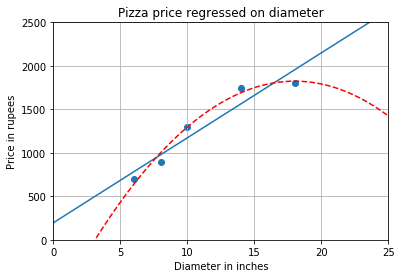

[[6], [8], [10], [14], [18]]
[[  1.   6.  36.]
 [  1.   8.  64.]
 [  1.  10. 100.]
 [  1.  14. 196.]
 [  1.  18. 324.]]
[[6], [8], [11], [16]]
[[  1.   6.  36.]
 [  1.   8.  64.]
 [  1.  11. 121.]
 [  1.  16. 256.]]
Simple linear regression r-squared 0.8097267977076651
Quadratic regression r-squared 0.8675443656345049


In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X_train = [[6], [8], [10], [14], [18]]
y_train = [[700], [900], [1300], [1750], [1800]]
X_test = [[6], [8], [11], [16]]
y_test = [[800], [1200], [1500], [1800]]

regressor = LinearRegression()
regressor.fit(X_train, y_train)

xx = np.linspace(0, 26, 100)
print(xx.shape)
yy = regressor.predict(xx.reshape(xx.shape[0], 1))
plt.plot(xx, yy)

quadratic_featurizer = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_featurizer.fit_transform(X_train)
X_test_quadratic = quadratic_featurizer.transform(X_test)

regressor_quadratic = LinearRegression()
regressor_quadratic.fit(X_train_quadratic, y_train)
xx_quadratic = quadratic_featurizer.transform(xx.reshape(xx.shape[0], 1))

plt.plot(xx, regressor_quadratic.predict(xx_quadratic), c='r', linestyle='--')
plt.title('Pizza price regressed on diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in rupees')
plt.axis([0, 25, 0, 2500])
plt.grid(True)
plt.scatter(X_train, y_train)
plt.show()
print(X_train)
print(X_train_quadratic)
print(X_test)
print(X_test_quadratic)
print('Simple linear regression r-squared', regressor.score(X_test, y_test))
print('Quadratic regression r-squared', regressor_quadratic.score(X_test_quadratic, y_test))

### Regularization

Regularization is a collection of techniques that can be used to prevent overfitting. Regularization adds information, often in the form of a penalty against complexity, to a problem. Occam's razor states that the hypothesis with the fewest assumptions is best. Accordingly, regularization attempts to find the simplest model that explains the data.

scikit-learn provides several regularized linear regression models. Ridge regression, also known as Tikhonov regularization, penalizes model parameters that become too large. Ridge regression modifies the RSS cost function by adding the L2 norm of the coefficients, as follows:

![Fig](imgs/lin_reg_022.png)

Lambda is a hyperparameter that controls the strength of the penalty. Recall that hyperparameters are parameters of the model that control how the learning algorithm learns. As lambda increases, the penalty increases, and the value of the cost function increases. When lambda is equal to zero, ridge regression is equal to linear regression.

scikit-learn also provides an implementation of the Least Absolute Shrinkage and Selection Operator (LASSO). The LASSO penalizes the coefficients by adding their L1 norm to the cost function, as follows:

![Fig](imgs/lin_reg_023.png)

The LASSO produces sparse parameters; most of the coefficients will become zero, and the model will depend on a small subset of the features. In contrast, ridge regression produces models in which most parameters are small but non-zero. When explanatory variables are correlated, the LASSO will shrink the coefficients of one variable towards zero. Ridge regression will shrink them more uniformly.

Finally, scikit-learn provides an implementation of elastic net regularization, which linearly combines the L1 and L2 penalties used by the LASSO and ridge regression. That is, LASSO and ridge regression are both special cases of the elastic net method in which the hyperparameter for either the L1 or L2 penalty is equal to zero.

## A simple example using the housing prices dataset

[Housing Prices Kaggle Competition](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

Outline
1. Preprocessing
2. Understanding the problem and the data available
3. Normality and skewness
4. Missing values
5. Dummy encoding
6. Rescaling

Regression
1. Linear regression
2. L1 regularisation
3. L2 regularisation
4. ElasticNet regularisation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [2]:
train = pd.read_csv('../datasets/housing-prices/train.csv')
test = pd.read_csv('../datasets/housing-prices/test.csv')
testID = test['Id']

data = pd.concat([train.drop('SalePrice', axis=1), test], keys=['train', 'test'])
data.drop(['Id'], axis=1, inplace=True)

In [3]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.isnull().sum()

Id               0   
MSSubClass       0   
MSZoning         0   
LotFrontage      259 
LotArea          0   
Street           0   
Alley            1369
LotShape         0   
LandContour      0   
Utilities        0   
LotConfig        0   
LandSlope        0   
Neighborhood     0   
Condition1       0   
Condition2       0   
BldgType         0   
HouseStyle       0   
OverallQual      0   
OverallCond      0   
YearBuilt        0   
YearRemodAdd     0   
RoofStyle        0   
RoofMatl         0   
Exterior1st      0   
Exterior2nd      0   
MasVnrType       8   
MasVnrArea       8   
ExterQual        0   
ExterCond        0   
Foundation       0   
                ..   
BedroomAbvGr     0   
KitchenAbvGr     0   
KitchenQual      0   
TotRmsAbvGrd     0   
Functional       0   
Fireplaces       0   
FireplaceQu      690 
GarageType       81  
GarageYrBlt      81  
GarageFinish     81  
GarageCars       0   
GarageArea       0   
GarageQual       81  
GarageCond       81  
PavedDrive

In [6]:
train.columns[train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [7]:
train['MSSubClass'].value_counts()

20     536
60     299
50     144
120    87 
30     69 
160    63 
70     60 
80     58 
90     52 
190    30 
85     20 
75     16 
45     12 
180    10 
40     4  
Name: MSSubClass, dtype: int64

In [8]:
import seaborn as sns

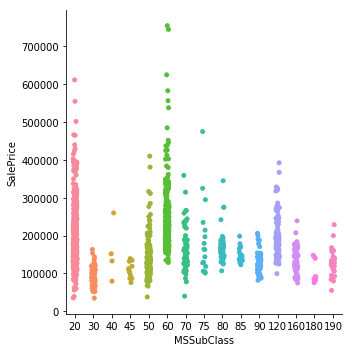

In [9]:
sns.catplot(x="MSSubClass", y="SalePrice", data=train);

In [10]:
data['MSSubClass'] = data['MSSubClass'].map(lambda x: 'MSSubClass_'+str(x))

In [11]:
data['MSSubClass'].value_counts()

MSSubClass_20     1079
MSSubClass_60     575 
MSSubClass_50     287 
MSSubClass_120    182 
MSSubClass_30     139 
MSSubClass_70     128 
MSSubClass_160    128 
MSSubClass_80     118 
MSSubClass_90     109 
MSSubClass_190    61  
MSSubClass_85     48  
MSSubClass_75     23  
MSSubClass_45     18  
MSSubClass_180    17  
MSSubClass_40     6   
MSSubClass_150    1   
Name: MSSubClass, dtype: int64

In [12]:
MSSubClass = pd.get_dummies(data['MSSubClass'])
MSSubClass.shape

(2919, 16)

In [13]:
data['MSZoning'].value_counts()

RL         2265
RM         460 
FV         139 
RH         26  
C (all)    25  
Name: MSZoning, dtype: int64

In [14]:
MSZoning = pd.get_dummies(data['MSZoning'])
MSZoning.shape

(2919, 5)

In [15]:
data['LotFrontage'].nunique()

128

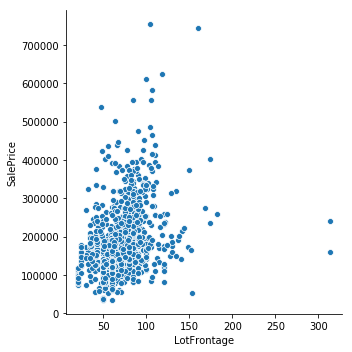

In [16]:
sns.relplot(x="LotFrontage", y="SalePrice", kind="scatter", data=train);

/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


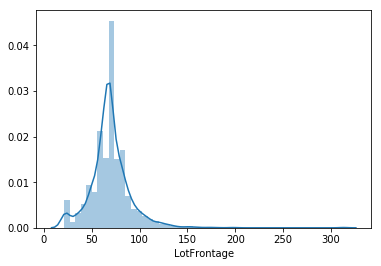

In [36]:
sns.distplot(data["LotFrontage"])

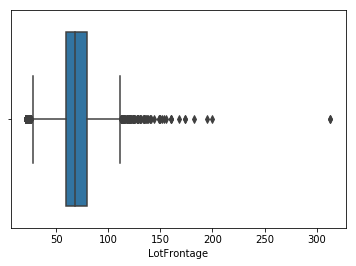

In [22]:
sns.boxplot(x=data["LotFrontage"])

In [23]:
data["LotFrontage"].describe()

count    2433.000000
mean     69.305795  
std      23.344905  
min      21.000000  
25%      59.000000  
50%      68.000000  
75%      80.000000  
max      313.000000 
Name: LotFrontage, dtype: float64

In [24]:
data['LotFrontage'].isnull().sum()

486

In [29]:
data['LotFrontage'].fillna(np.nanmedian(data['LotFrontage']), inplace=True)

In [38]:
bins = [0, 25, 30, 40, 50, 60, 70, 80, 100, 150, 200, 250, 350]
LotFrontage_bins = pd.get_dummies(pd.cut(data['LotFrontage'], bins))
LotFrontage_bins.shape

(2919, 12)

In [39]:
LotFrontage_bins.head()

(0, 25]  (25, 30]  (30, 40]  (40, 50]  (50, 60]  (60, 70]  (70, 80]  (80, 100]  (100, 150]  (150, 200]  (200, 250]  (250, 350]
train 0  0        0         0         0         0         1         0         0          0           0           0           0         
      1  0        0         0         0         0         0         1         0          0           0           0           0         
      2  0        0         0         0         0         1         0         0          0           0           0           0         
      3  0        0         0         0         1         0         0         0          0           0           0           0         
      4  0        0         0         0         0         0         0         1          0           0           0           0

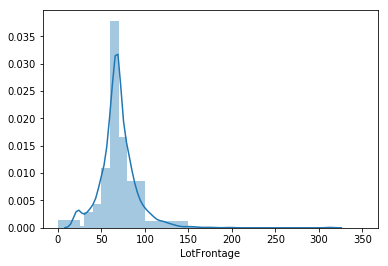

In [40]:
sns.distplot(data["LotFrontage"], bins=bins)

/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


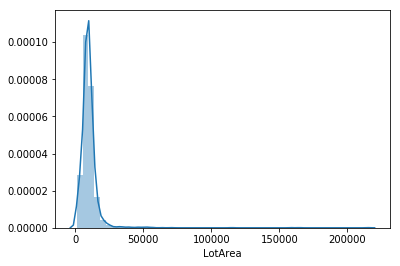

In [41]:
sns.distplot(data["LotArea"]) # we see a large tail to the right

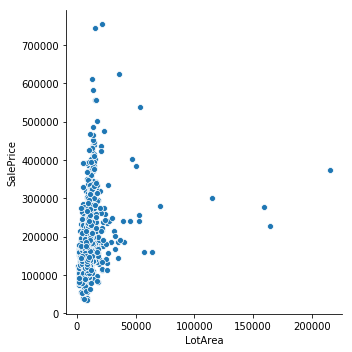

In [42]:
sns.relplot(x="LotArea", y="SalePrice", kind="scatter", data=train);

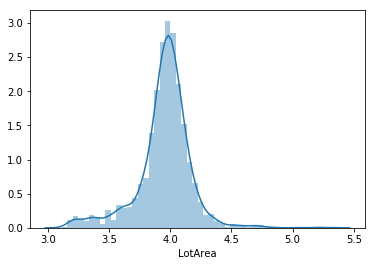

In [44]:
sns.distplot(np.log10(data["LotArea"]))

In [58]:
from sklearn.preprocessing import StandardScaler
X = np.log10(data["LotArea"]).values
print(X.shape)
             
LotArea = StandardScaler().fit_transform(X.reshape(-1,1))
print(LotArea.shape)

(2919,)
(2919, 1)


In [60]:
LotArea = pd.DataFrame(LotArea, columns=['LotArea'])

In [61]:
LotArea.head()

,LotArea
0,-0.103678
1,0.146571
2,0.457635
3,0.136329
4,0.922629


In [62]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [64]:
data['Street'].value_counts()

Pave    2907
Grvl    12  
Name: Street, dtype: int64

In [67]:
Street = pd.get_dummies(data['Street'])
Street.shape

(2919, 2)

In [68]:
Street.head()

Grvl  Pave
train 0  0     1   
      1  0     1   
      2  0     1   
      3  0     1   
      4  0     1

In [70]:
data['Alley'].value_counts(dropna=False) # more than 50% NA, drop this column but wait, use this as 
# per data description

NaN     2721
Grvl    120 
Pave    78  
Name: Alley, dtype: int64

In [72]:
data['LotShape'].value_counts(dropna=False)

Reg    1859
IR1    968 
IR2    76  
IR3    16  
Name: LotShape, dtype: int64

In [73]:
LotShape = pd.get_dummies(data['LotShape'])
LotShape.shape

(2919, 4)

In [74]:
data['LandContour'].value_counts(dropna=False)

Lvl    2622
HLS    120 
Bnk    117 
Low    60  
Name: LandContour, dtype: int64

In [75]:
LandContour = pd.get_dummies(data['LandContour'])
LandContour.shape

(2919, 4)

In [77]:
data['Utilities'].value_counts(dropna=False) # All values are almost same, drop this col

AllPub    2916
NaN       2   
NoSeWa    1   
Name: Utilities, dtype: int64

In [78]:
data = data.drop('Utilities', axis=1)

In [79]:
data['LotConfig'].value_counts()

Inside     2133
Corner     511 
CulDSac    176 
FR2        85  
FR3        14  
Name: LotConfig, dtype: int64

In [80]:
LotConfig = pd.get_dummies(data['LotConfig'])
LotConfig.shape

(2919, 5)

In [81]:
data['LandSlope'].value_counts()

Gtl    2778
Mod    125 
Sev    16  
Name: LandSlope, dtype: int64

In [82]:
LandSlope = pd.get_dummies(data['LandSlope'])
LandSlope.shape

(2919, 3)

In [83]:
data['LandSlope'].value_counts()

Gtl    2778
Mod    125 
Sev    16  
Name: LandSlope, dtype: int64

In [7]:
# Numerical variables
# LotFrontage: Linear feet of street connected to property
# LotArea: Lot size in square feet
# BsmtFinSF1: Type 1 finished square feet
# BsmtFinSF2: Type 2 finished square feet
# BsmtUnfSF: Unfinished square feet of basement area
# TotalBsmtSF: Total square feet of basement area
# 1stFlrSF: First Floor square feet
# 2ndFlrSF: Second floor square feet
# LowQualFinSF: Low quality finished square feet (all floors)
# GrLivArea: Above grade (ground) living area square feet
# BsmtFullBath: Basement full bathrooms
# BsmtHalfBath: Basement half bathrooms
# FullBath: Full bathrooms above grade
# HalfBath: Half baths above grade
# Bedroom: Bedrooms above grade (does NOT include basement bedrooms)
# Kitchen: Kitchens above grade
# TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
# Fireplaces: Number of fireplaces
# GarageCars: Size of garage in car capacity
# GarageArea: Size of garage in square feet
# WoodDeckSF: Wood deck area in square feet
# OpenPorchSF: Open porch area in square feet
# EnclosedPorch: Enclosed porch area in square feet
# 3SsnPorch: Three season porch area in square feet
# ScreenPorch: Screen porch area in square feet
# PoolArea: Pool area in square feet
# MiscVal: $Value of miscellaneous feature



num_cols = ['LotFrontage', 'LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
           '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
           'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
           'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']

cat_cols = [col for col in data.columns.tolist() if col not in num_cols]

In [8]:
[col for col in list(data.columns) if 'Bed' in col]

['BedroomAbvGr']

In [9]:
len(num_cols), len(cat_cols)

(24, 55)

In [10]:
from tqdm import tqdm_notebook
data_cat = pd.DataFrame()
for col in tqdm_notebook(cat_cols):
    if data[col].isnull().sum() > 0:
        data[col].fillna('UNK_'+col, inplace=True)
    data[col] = data[col].map(lambda x: col+str(x))
    mydf = pd.get_dummies(data[col])
    if len(data_cat) == 0:
        data_cat = mydf
    else:
        data_cat = pd.concat([data_cat, mydf], axis=1)

In [11]:
data_cat.shape

(2919, 1105)

In [12]:
data_cat.head()

MSSubClass120  MSSubClass150  MSSubClass160  MSSubClass180  MSSubClass190  MSSubClass20  MSSubClass30  MSSubClass40  MSSubClass45  MSSubClass50  MSSubClass60  MSSubClass70  MSSubClass75  MSSubClass80  MSSubClass85  MSSubClass90  MSZoningC (all)  MSZoningFV  MSZoningRH  MSZoningRL  MSZoningRM  MSZoningUNK_MSZoning  StreetGrvl  StreetPave  AlleyGrvl  AlleyPave  AlleyUNK_Alley  LotShapeIR1  LotShapeIR2  LotShapeIR3  LotShapeReg  LandContourBnk  LandContourHLS  LandContourLow  LandContourLvl  UtilitiesAllPub  UtilitiesNoSeWa  UtilitiesUNK_Utilities  LotConfigCorner  LotConfigCulDSac  LotConfigFR2  LotConfigFR3  LotConfigInside  LandSlopeGtl  LandSlopeMod  LandSlopeSev  NeighborhoodBlmngtn  NeighborhoodBlueste  NeighborhoodBrDale  NeighborhoodBrkSide  NeighborhoodClearCr  NeighborhoodCollgCr  NeighborhoodCrawfor  NeighborhoodEdwards  NeighborhoodGilbert  NeighborhoodIDOTRR  NeighborhoodMeadowV  NeighborhoodMitchel  NeighborhoodNAmes  NeighborhoodNPkVill  NeighborhoodNWAmes  NeighborhoodNoRidge  NeighborhoodNridgHt  NeighborhoodOldTown  NeighborhoodSWISU  NeighborhoodSawyer  NeighborhoodSawyerW  NeighborhoodSomerst  NeighborhoodStoneBr  NeighborhoodTimber  NeighborhoodVeenker  Condition1Artery  Condition1Feedr  Condition1Norm  Condition1PosA  Condition1PosN  Condition1RRAe  Condition1RRAn  Condition1RRNe  Condition1RRNn  Condition2Artery  Condition2Feedr  Condition2Norm  Condition2PosA  Condition2PosN  Condition2RRAe  Condition2RRAn  Condition2RRNn  BldgType1Fam  BldgType2fmCon  BldgTypeDuplex  BldgTypeTwnhs  BldgTypeTwnhsE  HouseStyle1.5Fin  HouseStyle1.5Unf  HouseStyle1Story  HouseStyle2.5Fin  HouseStyle2.5Unf  HouseStyle2Story  HouseStyleSFoyer  HouseStyleSLvl  OverallQual1  OverallQual10  OverallQual2  OverallQual3  OverallQual4  OverallQual5  OverallQual6  OverallQual7  OverallQual8  OverallQual9  OverallCond1  OverallCond2  OverallCond3  OverallCond4  OverallCond5  OverallCond6  OverallCond7  OverallCond8  OverallCond9  YearBuilt1872  YearBuilt1875  YearBuilt1879  YearBuilt1880  YearBuilt1882  YearBuilt1885  YearBuilt1890  YearBuilt1892  YearBuilt1893  YearBuilt1895  YearBuilt1896  YearBuilt1898  YearBuilt1900  YearBuilt1901  YearBuilt1902  YearBuilt1904  YearBuilt1905  YearBuilt1906  YearBuilt1907  YearBuilt1908  YearBuilt1910  YearBuilt1911  YearBuilt1912  YearBuilt1913  YearBuilt1914  YearBuilt1915  YearBuilt1916  YearBuilt1917  YearBuilt1918  YearBuilt1919  YearBuilt1920  YearBuilt1921  YearBuilt1922  YearBuilt1923  YearBuilt1924  YearBuilt1925  YearBuilt1926  YearBuilt1927  YearBuilt1928  YearBuilt1929  YearBuilt1930  YearBuilt1931  YearBuilt1932  YearBuilt1934  YearBuilt1935  YearBuilt1936  YearBuilt1937  YearBuilt1938  YearBuilt1939  YearBuilt1940  YearBuilt1941  YearBuilt1942  YearBuilt1945  YearBuilt1946  YearBuilt1947  YearBuilt1948  YearBuilt1949  YearBuilt1950  YearBuilt1951  YearBuilt1952  YearBuilt1953  YearBuilt1954  YearBuilt1955  YearBuilt1956  YearBuilt1957  YearBuilt1958  YearBuilt1959  YearBuilt1960  YearBuilt1961  YearBuilt1962  YearBuilt1963  YearBuilt1964  YearBuilt1965  YearBuilt1966  YearBuilt1967  YearBuilt1968  YearBuilt1969  YearBuilt1970  YearBuilt1971  YearBuilt1972  YearBuilt1973  YearBuilt1974  YearBuilt1975  YearBuilt1976  YearBuilt1977  YearBuilt1978  YearBuilt1979  YearBuilt1980  YearBuilt1981  YearBuilt1982  YearBuilt1983  YearBuilt1984  YearBuilt1985  YearBuilt1986  YearBuilt1987  YearBuilt1988  YearBuilt1989  YearBuilt1990  YearBuilt1991  YearBuilt1992  YearBuilt1993  YearBuilt1994  YearBuilt1995  YearBuilt1996  YearBuilt1997  YearBuilt1998  YearBuilt1999  YearBuilt2000  YearBuilt2001  YearBuilt2002  YearBuilt2003  YearBuilt2004  YearBuilt2005  YearBuilt2006  YearBuilt2007  YearBuilt2008  YearBuilt2009  YearBuilt2010  YearRemodAdd1950  YearRemodAdd1951  YearRemodAdd1952  YearRemodAdd1953  YearRemodAdd1954  YearRemodAdd1955  YearRemodAdd1956  YearRemodAdd1957  YearRemodAdd1958  YearRemodAdd1959  YearRemodAdd1960  YearRemodAdd1961  YearRemodAdd1962  YearRemodAdd1963  YearRemodAdd1964  YearRe

In [13]:
# data_num = data[num_cols]

In [14]:
bins = [0, 25, 30, 40, 50, 60, 70, 80, 100, 150, 200, 250, 350]
data['LotFrontage'].fillna(np.nanmedian(data['LotFrontage']), inplace=True)
columns = ['LotFrontage_bin'+str(x) for x in range(len(bins)-1)]
LotFrontage_bins = pd.get_dummies(pd.cut(data['LotFrontage'], bins))
LotFrontage_bins.columns = columns
data_cat = pd.concat([data_cat, LotFrontage_bins], axis=1)

In [15]:
data_cat.head(1)

,,MSSubClass120,MSSubClass150,MSSubClass160,MSSubClass180,MSSubClass190,MSSubClass20,MSSubClass30,MSSubClass40,MSSubClass45,MSSubClass50,MSSubClass60,MSSubClass70,MSSubClass75,MSSubClass80,MSSubClass85,MSSubClass90,MSZoningC (all),MSZoningFV,MSZoningRH,MSZoningRL,MSZoningRM,MSZoningUNK_MSZoning,StreetGrvl,StreetPave,AlleyGrvl,AlleyPave,AlleyUNK_Alley,LotShapeIR1,LotShapeIR2,LotShapeIR3,LotShapeReg,LandContourBnk,LandContourHLS,LandContourLow,LandContourLvl,UtilitiesAllPub,UtilitiesNoSeWa,UtilitiesUNK_Utilities,LotConfigCorner,LotConfigCulDSac,LotConfigFR2,LotConfigFR3,LotConfigInside,LandSlopeGtl,LandSlopeMod,LandSlopeSev,NeighborhoodBlmngtn,NeighborhoodBlueste,NeighborhoodBrDale,NeighborhoodBrkSide,NeighborhoodClearCr,NeighborhoodCollgCr,NeighborhoodCrawfor,NeighborhoodEdwards,NeighborhoodGilbert,NeighborhoodIDOTRR,NeighborhoodMeadowV,NeighborhoodMitchel,NeighborhoodNAmes,NeighborhoodNPkVill,NeighborhoodNWAmes,NeighborhoodNoRidge,NeighborhoodNridgHt,NeighborhoodOldTown,NeighborhoodSWISU,NeighborhoodSawyer,NeighborhoodSawyerW,NeighborhoodSomerst,NeighborhoodStoneBr,NeighborhoodTimber,NeighborhoodVeenker,Condition1Artery,Condition1Feedr,Condition1Norm,Condition1PosA,Condition1PosN,Condition1RRAe,Condition1RRAn,Condition1RRNe,Condition1RRNn,Condition2Artery,Condition2Feedr,Condition2Norm,Condition2PosA,Condition2PosN,Condition2RRAe,Condition2RRAn,Condition2RRNn,BldgType1Fam,BldgType2fmCon,BldgTypeDuplex,BldgTypeTwnhs,BldgTypeTwnhsE,HouseStyle1.5Fin,HouseStyle1.5Unf,HouseStyle1Story,HouseStyle2.5Fin,HouseStyle2.5Unf,HouseStyle2Story,HouseStyleSFoyer,HouseStyleSLvl,OverallQual1,OverallQual10,OverallQual2,OverallQual3,OverallQual4,OverallQual5,OverallQual6,OverallQual7,OverallQual8,OverallQual9,OverallCond1,OverallCond2,OverallCond3,OverallCond4,OverallCond5,OverallCond6,OverallCond7,OverallCond8,OverallCond9,YearBuilt1872,YearBuilt1875,YearBuilt1879,YearBuilt1880,YearBuilt1882,YearBuilt1885,YearBuilt1890,YearBuilt1892,YearBuilt1893,YearBuilt1895,YearBuilt1896,YearBuilt1898,YearBuilt1900,YearBuilt1901,YearBuilt1902,YearBuilt1904,YearBuilt1905,YearBuilt1906,YearBuilt1907,YearBuilt1908,YearBuilt1910,YearBuilt1911,YearBuilt1912,YearBuilt1913,YearBuilt1914,YearBuilt1915,YearBuilt1916,YearBuilt1917,YearBuilt1918,YearBuilt1919,YearBuilt1920,YearBuilt1921,YearBuilt1922,YearBuilt1923,YearBuilt1924,YearBuilt1925,YearBuilt1926,YearBuilt1927,YearBuilt1928,YearBuilt1929,YearBuilt1930,YearBuilt1931,YearBuilt1932,YearBuilt1934,YearBuilt1935,YearBuilt1936,YearBuilt1937,YearBuilt1938,YearBuilt1939,YearBuilt1940,YearBuilt1941,YearBuilt1942,YearBuilt1945,YearBuilt1946,YearBuilt1947,YearBuilt1948,YearBuilt1949,YearBuilt1950,YearBuilt1951,YearBuilt1952,YearBuilt1953,YearBuilt1954,YearBuilt1955,YearBuilt1956,YearBuilt1957,YearBuilt1958,YearBuilt1959,YearBuilt1960,YearBuilt1961,YearBuilt1962,YearBuilt1963,YearBuilt1964,YearBuilt1965,YearBuilt1966,YearBuilt1967,YearBuilt1968,YearBuilt1969,YearBuilt1970,YearBuilt1971,YearBuilt1972,YearBuilt1973,YearBuilt1974,YearBuilt1975,YearBuilt1976,YearBuilt1977,YearBuilt1978,YearBuilt1979,YearBuilt1980,YearBuilt1981,YearBuilt1982,YearBuilt1983,YearBuilt1984,YearBuilt1985,YearBuilt1986,YearBuilt1987,YearBuilt1988,YearBuilt1989,YearBuilt1990,YearBuilt1991,YearBuilt1992,YearBuilt1993,YearBuilt1994,YearBuilt1995,YearBuilt1996,YearBuilt1997,YearBuilt1998,YearBuilt1999,YearBuilt2000,YearBuilt2001,YearBuilt2002,YearBuilt2003,YearBuilt2004,YearBuilt2005,YearBuilt2006,YearBuilt2007,YearBuilt2008,YearBuilt2009,YearBuilt2010,YearRemodAdd1950,YearRemodAdd1951,YearRemodAdd1952,YearRemodAdd1953,YearRemodAdd1954,YearRemodAdd1955,YearRemodAdd1956,YearRemodAdd1957,YearRemodAdd1958,YearRemodAdd1959,YearRemodAdd1960,YearRemodAdd1961,YearRemodAdd1962,YearRemodAdd1963,YearRemodAdd1964,YearRemodAdd1965,YearRemodAdd1966,YearRemodAdd1967,YearRemodAdd1968,YearRemodAdd1969,YearRemodAdd1970,YearRemodAdd1971,YearRemodAdd1972,YearRemodAdd1973,YearRemodAdd1974,YearRemodAdd1975,YearRemodAdd1976,YearRemodAdd1977,YearRemodAdd1978,YearRemodAdd1979,Ye

In [16]:
num_cols.remove('LotFrontage')

In [17]:
num_cols

['LotArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea']

In [18]:
data_num = data[num_cols]

In [19]:
for col in num_cols:
    print(col, data_num[col].nunique(dropna=False))
    data_num[col].fillna(np.nanmedian(data_num[col]))

LotArea 1951
BsmtFinSF1 992
BsmtFinSF2 273
BsmtUnfSF 1136
TotalBsmtSF 1059
1stFlrSF 1083
2ndFlrSF 635
LowQualFinSF 36
GrLivArea 1292
BsmtFullBath 5
BsmtHalfBath 4
FullBath 5
HalfBath 3
TotRmsAbvGrd 14
Fireplaces 5
GarageCars 7
GarageArea 604
WoodDeckSF 379
OpenPorchSF 252
EnclosedPorch 183
3SsnPorch 31
ScreenPorch 121
PoolArea 14


In [ ]:
# from sklearn.preprocessing import StandardScaler
# X = np.log10(data["LotArea"]).values
# print(X.shape)
             
# LotArea = StandardScaler().fit_transform(X.reshape(-1,1))
# print(LotArea.shape)

In [22]:
from sklearn.preprocessing import StandardScaler
for col in num_cols:
    print(col)
    if data_num[col].isnull().any() == True:
        print(col, np.nanmedian(data_num[col]))
        data_num[col].fillna(np.nanmedian(data_num[col]), inplace=True)
    X = data_num[col].values
    data_num[col] = StandardScaler().fit_transform(X.reshape(-1,1)).ravel()

LotArea
BsmtFinSF1
BsmtFinSF1 368.5
BsmtFinSF2
BsmtFinSF2 0.0


/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame



BsmtUnfSF
BsmtUnfSF 467.0
TotalBsmtSF
TotalBsmtSF 989.5


/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea


/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame



BsmtFullBath
BsmtFullBath 0.0
BsmtHalfBath
BsmtHalfBath 0.0
FullBath


/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

HalfBath
TotRmsAbvGrd
Fireplaces
GarageCars
GarageCars 2.0
GarageArea
GarageArea 480.0


/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/utils/val

WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea


/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardS

In [23]:
data_num.isnull().sum()

LotArea          0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
dtype: int64

In [24]:
data_cat.isnull().any()

MSSubClass120           False
MSSubClass150           False
MSSubClass160           False
MSSubClass180           False
MSSubClass190           False
MSSubClass20            False
MSSubClass30            False
MSSubClass40            False
MSSubClass45            False
MSSubClass50            False
MSSubClass60            False
MSSubClass70            False
MSSubClass75            False
MSSubClass80            False
MSSubClass85            False
MSSubClass90            False
MSZoningC (all)         False
MSZoningFV              False
MSZoningRH              False
MSZoningRL              False
MSZoningRM              False
MSZoningUNK_MSZoning    False
StreetGrvl              False
StreetPave              False
AlleyGrvl               False
AlleyPave               False
AlleyUNK_Alley          False
LotShapeIR1             False
LotShapeIR2             False
LotShapeIR3             False
                        ...  
YrSold2009              False
YrSold2010              False
SaleTypeCO

In [25]:
data_num.shape

(2919, 23)

In [26]:
data_cat.shape

(2919, 1117)

In [27]:
from scipy.sparse import csr_matrix, hstack

In [39]:
data_processed = pd.concat([data_num, data_cat], axis=1)

In [28]:
data_mat_sparse = hstack((data_num, data_cat)).tocsr()

In [29]:
data_mat_sparse.shape

(2919, 1140)

In [30]:
data_mat_train = data_mat_sparse[:len(train)]
data_mat_test = data_mat_sparse[len(train):]

In [31]:
from sklearn.model_selection import train_test_split
X = data_mat_train
y = train['SalePrice'].values
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Regression, no regulaization

In [32]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [33]:
lr.score(X_val, y_val)

0.38035898326546

#### Top influencers

In [40]:
maxcoef = np.argsort(-np.abs(lr.coef_))
coef = lr.coef_[maxcoef]
for i in range(0, 5):
    print("{:.<025} {:< 010.4e}".format(data_processed.columns[maxcoef[i]], coef[i]))

PoolQCUNK_PoolQC.........  2.8374e+06
PoolQCGd................. -1.5867e+06
PoolQCFa................. -1.1400e+06
MiscFeatureTenC..........  6.0774e+05
PoolQCEx................. -3.7357e+05


### Linear Regression, L1 regularization

In [41]:
from sklearn.linear_model import LassoCV

In [42]:
lr = LassoCV()
lr.fit(X_train, y_train)

/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [43]:
lr.score(X_val, y_val)

0.8858533057801232

In [44]:
maxcoef = np.argsort(-np.abs(lr.coef_))
coef = lr.coef_[maxcoef]
for i in range(0, 5):
    print("{:.<025} {:< 010.4e}".format(data_processed.columns[maxcoef[i]], coef[i]))

RoofMatlClyTile.......... -2.6590e+05
MasVnrArea762.0.......... -1.2598e+05
OverallQual10............  5.4701e+04
OverallQual9.............  4.4902e+04
NeighborhoodNoRidge......  2.7169e+04


### Linear Regression, L2 regularization

In [46]:
from sklearn.linear_model import RidgeCV
lr = RidgeCV()
lr.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
    gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [47]:
lr.score(X_val, y_val)

0.8670752113631683

In [48]:
maxcoef = np.argsort(-np.abs(lr.coef_))
coef = lr.coef_[maxcoef]
for i in range(0, 5):
    print("{:.<025} {:< 010.4e}".format(data_processed.columns[maxcoef[i]], coef[i]))

LotFrontage_bin11........ -2.4089e+04
RoofMatlClyTile.......... -2.3629e+04
MasVnrArea796.0.......... -2.3629e+04
OverallQual9.............  2.3125e+04
NeighborhoodStoneBr......  2.1454e+04


### Linear regression, elastic net

In [51]:
from sklearn.linear_model import ElasticNetCV
lr = ElasticNetCV()
lr.fit(X_train, y_train)

/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


ElasticNetCV(alphas=None, copy_X=True, cv='warn', eps=0.001,
       fit_intercept=True, l1_ratio=0.5, max_iter=1000, n_alphas=100,
       n_jobs=None, normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [52]:
lr.score(X_val, y_val)

0.13801362141684392

In [53]:
X = data_mat_train
y = np.log1p(train['SalePrice'].values)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
for lr in [LinearRegression(), LassoCV(), RidgeCV(), ElasticNetCV()]:
    lr.fit(X_train, y_train)
#     print(lr.score(X_val, y_val))
    r2 = lr.score(X_val, y_val)
    adj_r2 = 1 - ((1 - (r2 ** 2)) * ((X_val.shape[1] - 1) / (X_val.shape[0] - X_val.shape[1] - 1)))
    print(r2, adj_r2)

0.8083602361527944 1.464928971594077


/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.888791648945621 1.2817977291246088
0.8917287739139952 1.2747817963585477


/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.8959069910849913 1.2647613728235778


In [61]:
from scipy.sparse import save_npz
data_num.to_csv('../cache/data_num.csv', index=False)
data_cat.to_csv('../cache/data_cat.csv', index=False)
y = train['SalePrice'].values
np.save('../cache/y_train_housing_prices', y)
save_npz('../cache/data_mat_sparse.npz', data_mat_sparse)